In [1]:
import numpy as np
import cv2 
from matplotlib import pyplot as plt

In [2]:
img = cv2.imread('water_coins.jpg')

# 이진화 
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

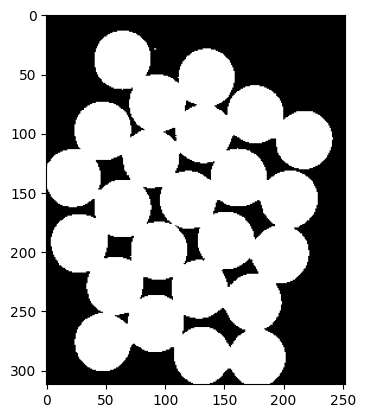

In [3]:
plt.imshow(thresh, cmap='gray')

In [4]:
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

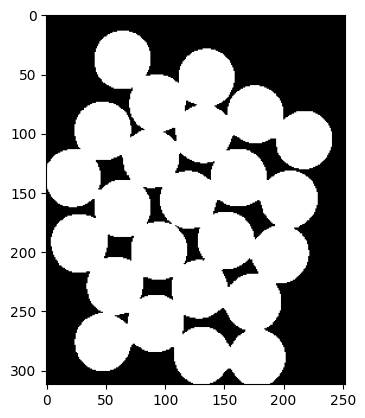

In [5]:
plt.imshow(opening, cmap='gray')

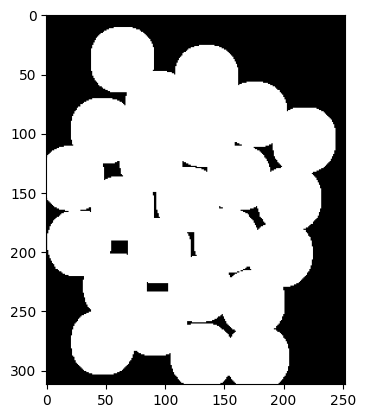

In [7]:
sure_bg = cv2.dilate(opening,kernel,iterations=3)
plt.imshow(sure_bg, cmap='gray')

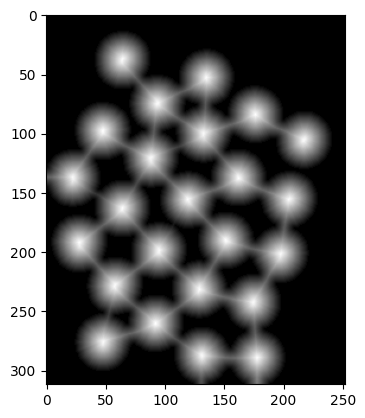

In [9]:
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2, 5)
plt.imshow(dist_transform, cmap='gray')

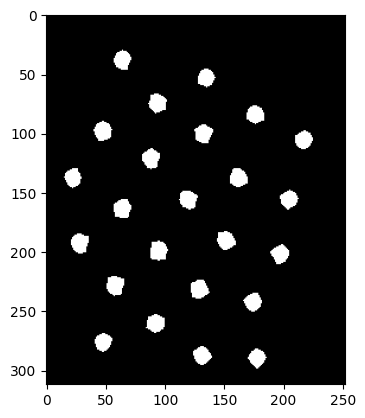

In [10]:
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
plt.imshow(sure_fg, cmap='gray')

In [11]:
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

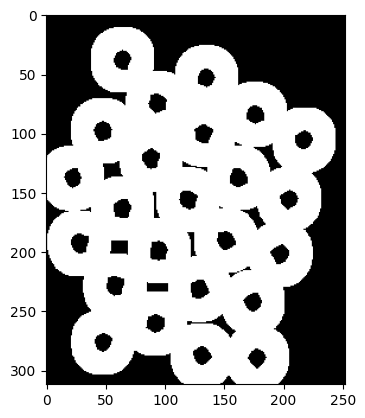

In [12]:
plt.imshow(unknown, cmap='gray')

In [25]:
ret, markers = cv2.connectedComponents(sure_fg)

In [26]:
np.unique(markers)
#plt.imshow(markers)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24], dtype=int32)

In [27]:
markers = markers+1

In [28]:
np.unique(markers)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25])

In [29]:
markers[unknown==255] = 0

In [30]:
markers_w = markers.copy()
markers_w = cv2.watershed(img, markers_w)

In [31]:
np.unique(markers_w)

array([-1,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25])

In [32]:
img_final  = img.copy()
img_final[markers_w == -1] = [255,0,0]

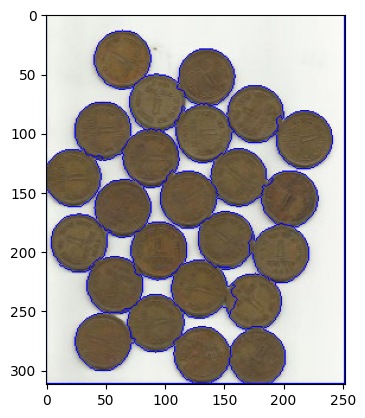

In [33]:
plt.imshow(img_final[:,:,::-1])